In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline

In [3]:
# create directory variables for easy access to data
main_dir = '../input/chest-xray-pneumonia/chest_xray/'
train_data_dir = main_dir + 'train/'
validation_data_dir = main_dir + 'validation/'
test_data_dir = main_dir + 'test/'
train_n = train_data_dir + 'NORMAL/'
train_p = train_data_dir + 'PNEUMONIA/'

In [4]:
# Split the images into normal and pneumonia
normal_images = [fn for fn in os.listdir(train_n) if fn.endswith('.jpeg')]
pneumonia_images = [fn for fn in os.listdir(train_p) if fn.endswith('.jpeg')]

In [5]:
# select three images randomly from both categories
random_normal = np.random.choice(normal_images, 3, replace=False)
random_pneu = np.random.choice(pneumonia_images, 3, replace=False)
print(random_normal)
print(random_pneu)

['NORMAL2-IM-0798-0001.jpeg' 'IM-0622-0001-0002.jpeg' 'IM-0622-0001.jpeg']
['person1320_bacteria_3353.jpeg' 'person1709_bacteria_4522.jpeg'
 'person1115_bacteria_3056.jpeg']


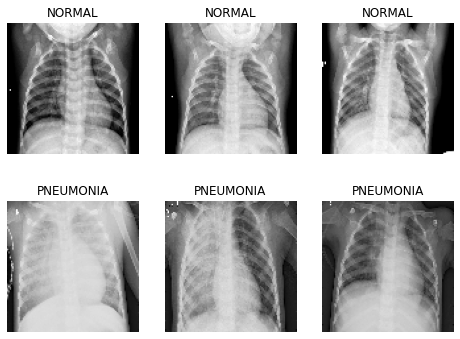

In [6]:
# plotting 2 x 3 image matrix
fig = plt.figure(figsize = (8,6))
for i in range(6):
    if i < 3:
        fp = f'{train_n}/{random_normal[i]}'
        label = 'NORMAL'
    else:
        fp = f'{train_p}/{random_pneu[i-3]}'
        label = 'PNEUMONIA'
    ax = fig.add_subplot(2, 3, i+1)
    
    # to plot without rescaling, remove target_size
    fn = image.load_img(fp, target_size = (100,100), color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

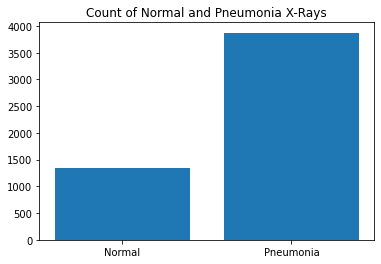

Normal: 1341
Pneumonia: 3875


In [7]:
# view the number of Normal vs Pneumonia x-ray images
X = [len(normal_images), len(pneumonia_images)]
plt.bar(['Normal', 'Pneumonia'],X)
plt.title('Count of Normal and Pneumonia X-Rays')
plt.show()
print(f'Normal: {len(normal_images)}')
print(f'Pneumonia: {len(pneumonia_images)}')

### Pneumonia Distribution in Training Set
The data is imbalanced between Normal and Pneumonia. A good technique that can be used to get closer to a balanced dataset is during that during the image augmentation process, resample the Normal images at a higher percentage than the Pneumonia group.

In [8]:
# Split the images into normal and pneumonia from test data
test_n = test_data_dir + 'NORMAL/'
test_p = test_data_dir + 'PNEUMONIA/'

normal_images_test = [fn for fn in os.listdir(test_n) if fn.endswith('.jpeg')]
pneumonia_images_test = [fn for fn in os.listdir(test_p) if fn.endswith('.jpeg')]

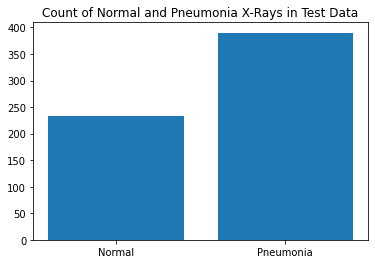

Normal: 234
Pneumonia: 390


In [9]:
# view the number of Normal vs Pneumonia x-ray images
X = [len(normal_images_test), len(pneumonia_images_test)]
plt.bar(['Normal', 'Pneumonia'],X)
plt.title('Count of Normal and Pneumonia X-Rays in Test Data')
plt.show()
print(f'Normal: {len(normal_images_test)}')
print(f'Pneumonia: {len(pneumonia_images_test)}')

### Pneumonia Distribution in Testing Set
The testing data is imbalanced between Normal and Pneumonia. Surprisingly, it is a different distribution proportion than the training data. A good technique that can be used to get closer to a balanced dataset is during that during the image augmentation process, resample the Normal images at a higher percentage than the Pneumonia group.

## Convert the images into Numpy pixel arrays

In [10]:
# create a function for image conversion to numpy array
def image2numpy(path, list_of_filenames, size=(64, 64)):
    # iterate through each file
    for filename in list_of_filenames:
        filepath = path + filename
        current_image = image.load_img(filepath, target_size=size, color_mode='grayscale')
        
        # convert image to a matrix n x m size 
        # n is number of observations and m is the number of samples
        img_ts = image.img_to_array(current_image)
    
        # turn into vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate images to the full list
            full_matrix = np.concatenate((full_matrix, img_ts))
        except:
            # on the first round full_matrix needs to be assigned
            full_matrix = img_ts
        
    return full_matrix


In [11]:
# create pixel matrices for the normal and the pneumonia datasets
normal_images_matrix = image2numpy(f'{train_data_dir}/NORMAL/', normal_images)
pneumonia_images_matrix = image2numpy(f'{train_data_dir}/PNEUMONIA/', pneumonia_images)

#### There is now a normal matrix and a pneumonia matrix with all the X-ray images as a single array per X-ray

In [12]:
# confirm number of x-rays and number of pixels
print('Normal Images Count:', len(normal_images))
print('Normal Images Pixel Count:', len(normal_images_matrix[0]))
print('Pneumonia Images Count:', len(pneumonia_images))
print('Pneumonia Images Pixel Count:', len(pneumonia_images_matrix[0]))


Normal Images Count: 1341
Normal Images Pixel Count: 4096
Pneumonia Images Count: 3875
Pneumonia Images Pixel Count: 4096


#### This is what is expected for the output

## View the Average Image for Each Class

In [13]:
# create a function to get the mean of each pixel
def find_mean_image(full_matrix, class_name, size = (64, 64)):
    # caculate the average
    mean_image = np.mean(full_matrix, axis = 0)
    # reshape vector into a 64x64 matrix
    mean_image = mean_image.reshape(size)
    # display the image
    plt.imshow(mean_image, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {class_name}')
    plt.axis('off')
    plt.show()
    return mean_image

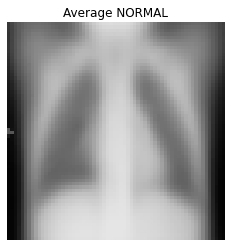

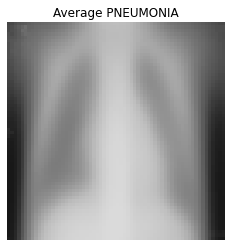

In [14]:
norm_mean = find_mean_image(normal_images_matrix, 'NORMAL')
pneumonia_mean = find_mean_image(pneumonia_images_matrix, 'PNEUMONIA')

## Analysis of Average Class X-ray:

The x-ray image for the pneumonia class has less clarity of the lungs. This leads me to beleive that even slight greying of the lungs area could be an indication of pneumonia. This would be difficult for a human to read, but by using a threshold for the amount of light pixels in the lung area, a machine could identify that quite easily.

## Contrast Between Average Images

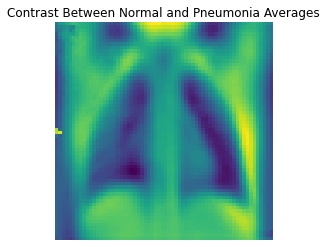

In [15]:
# calculate the difference between normal and pneumonia
contrast_mean = norm_mean - pneumonia_mean

# display the contrast
plt.imshow(contrast_mean)
plt.title('Contrast Between Normal and Pneumonia Averages')
plt.axis('off')
plt.show()

## Standard Deviation Between Normal and Pneumonia Images

In [16]:
# create a function to get the standard deviation of each pixel
def find_std_image(full_matrix, class_name, size = (64, 64)):
    # caculate the standard deviation
    std_image = np.std(full_matrix, axis = 0)*2 #double values for better visability
    # reshape vector into a 64x64 matrix
    std_image = std_image.reshape(size)
    # display the image
    plt.imshow(std_image, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {class_name}')
    plt.axis('off')
    plt.show()
    return std_image

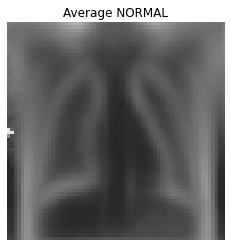

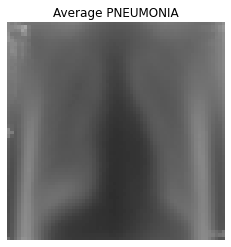

In [17]:
# view the standard deviation of each class
normal_std = find_std_image(normal_images_matrix, 'NORMAL')
pneumonia_std = find_std_image(pneumonia_images_matrix, 'PNEUMONIA')

## Analysis of Standard Deviation:

This clearly shows that pneumonia x-ray images have more variability in the lung region. So looking for a certain percentage of lighter pixels might be a good algorithmic indicator.

## Eigenimages

Use Principal Compenant Analysis (PCA) to plot the eigenvectors into an image.


In [18]:
from sklearn.decomposition import PCA
from math import ceil

In [19]:
def eigenimages(full_matrix, class_name, n_comp=0.7, size=(64,64)):
    # fit PCA to describe n_comp * variability in the class
    pca = PCA(n_components=n_comp, whiten=True)
    pca.fit(full_matrix)
    print('Number of PC: ', pca.n_components_)
    return pca

def plot_pca(pca, size=(64,64)):
    # plot eigenimages in a grid
    n = pca.n_components_
    fig = plt.figure(figsize=(8,8))
    r = int(np.sqrt(n))
    c = ceil(n / r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i+1, xticks=[], yticks=[])
        ax.imshow(pca.components_[i].reshape(size), cmap='Greys_r')
        plt.axis('off')
        plt.show()
        
    

In [20]:
# calculate the principal components of the normal x-rays
normal_eigenimages = eigenimages(normal_images_matrix, 'NORMAL')


Number of PC:  28


## View the Normal X-Ray Eigenimages

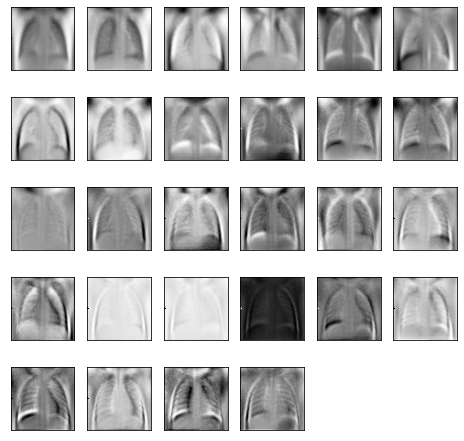

In [21]:
n = normal_eigenimages.n_components_
row = int(np.sqrt(n))
col = ceil(n / row)
size = (64,64)

fig = plt.figure(figsize=(8,8))

for i in range(n):
    ax = fig.add_subplot(row, col, i+1, xticks=[], yticks=[])
    ax.imshow(normal_eigenimages.components_[i].reshape(size), cmap='Greys_r')
    
plt.show()

## View the Pneumonia Eigenimages

In [22]:
# calculate the principal components of the pneumonia x-rays
pneumonia_eigenimages = eigenimages(pneumonia_images_matrix, 'PNEUMONIA')

Number of PC:  14


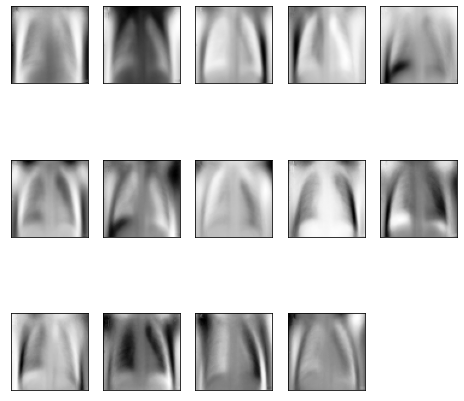

In [23]:
n = pneumonia_eigenimages.n_components_
row = int(np.sqrt(n))
col = ceil(n / row)
size = (64,64)

fig = plt.figure(figsize=(8,8))

for i in range(n):
    ax = fig.add_subplot(row, col, i+1, xticks=[], yticks=[])
    ax.imshow(pneumonia_eigenimages.components_[i].reshape(size), cmap='Greys_r')
    
plt.show()

## Analysis of the Eigenimages:

The normal X-rays have much more distinct edges to the principal components than do the pneumonia images. The lungs and rib cage are much more clearly defined in the normal images than in the pneumonia images.

## View Pixel Histograms for Pneumonia and Normal Images

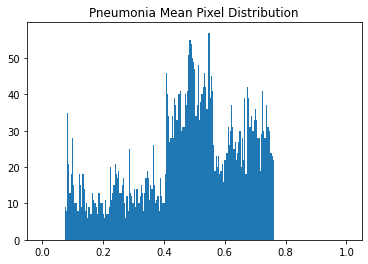

In [24]:
# view the pixel histogram for the pneumonia mean image
pneumonia_mean_norm = pneumonia_mean.ravel() / 255.0
plt.hist(pneumonia_mean_norm, bins = 256, range=(0.0, 1.0))
plt. title('Pneumonia Mean Pixel Distribution')
plt.show()

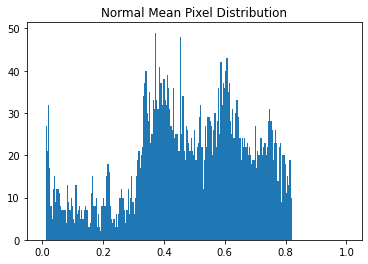

In [25]:
# view the pixel histogram for the normal meanimage
norm_mean_norm = norm_mean.ravel() / 255.0
plt.hist(norm_mean_norm, bins = 256, range=(0.0, 1.0))
plt. title('Normal Mean Pixel Distribution')
plt.show()

### Analysis of the Pixel Distributions
The pixel distributions between normal and pneumonia have a different profile. Let's look at an overlay of the two distributions.

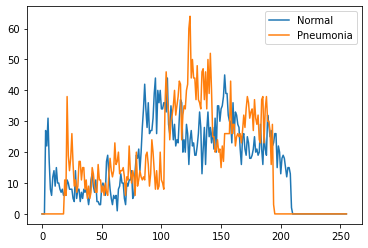

In [26]:
# importing required libraries of opencv
import cv2

# calculate frequency of pixels in range 0-255
hist_norm = cv2.calcHist([norm_mean], [0], None, [256], [0, 256]) 
hist_pneum = cv2.calcHist([pneumonia_mean], [0], None, [256], [0, 256])
plt.plot(hist_norm, label='Normal')
plt.plot(hist_pneum, label='Pneumonia')
plt.legend()
plt.show()

#### There is a distinct peak at around 125 for the pneumonia mean iamge that is not present in the normal mean image. This might be a good indication of a feature that might help distinguish between the two classes. 

### Compare Ten Normal X-Ray Pixel Distributions
By comparing ten normal x-ray pixel distributions to the mean distribution, it will show whether the mean is actually a good representative of the images in general, or whether it might need to investigated further.

In [27]:
# select ten images randomly from normal and pneumonia
random_normal = np.random.choice(normal_images, 10, replace=False)
random_pneumonia = np.random.choice(pneumonia_images, 10, replace=False)

In [28]:
# create pixel matrices for the normal and the pneumonia datasets
normal_images_matrix_10 = image2numpy(f'{train_data_dir}/NORMAL/', random_normal)
pneumonia_images_matrix_10 = image2numpy(f'{train_data_dir}/PNEUMONIA/', random_pneumonia)

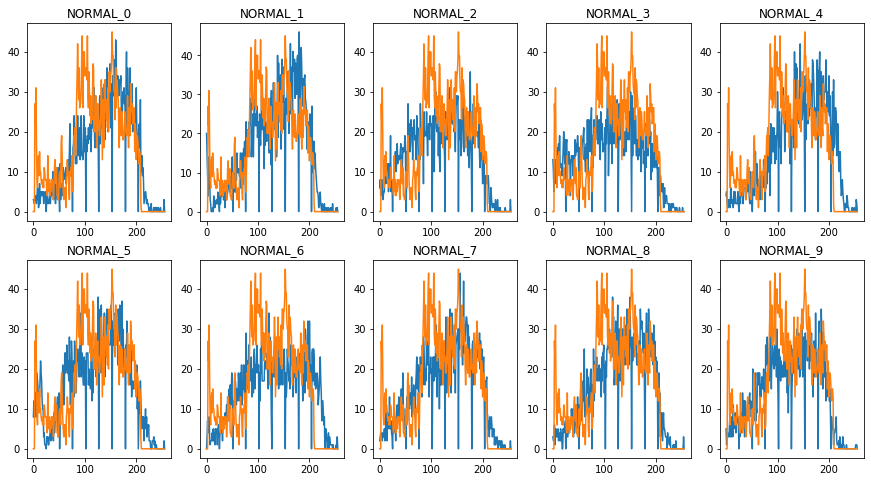

In [29]:
fig = plt.figure(figsize = (15,8))
for i in range(10):
    norm_img = normal_images_matrix_10[i]
    hist_n = cv2.calcHist([norm_img], [0], None, [256], [10, 256]) # adjust the range to avoid a spike at 0
    label = f'NORMAL_{i}'
    ax = fig.add_subplot(2, 5, i+1)
    plt.plot(hist_n, label='Normal' )
    plt.plot(hist_norm, label='Mean')
    plt.title(label)
plt.show()

### Analysis of the Normal Intensity plots
There is some variability in the normal images as can be seen from these 10 pixel intensity comparisons.

### Compare Ten Pneumonia X-Ray Pixel Distributions
By comparing ten pneumonia x-ray pixel distributions to the mean distribution, it will show whether the mean is actually a good representative of the pneumonia images in general, or whether it might need to investigated further.

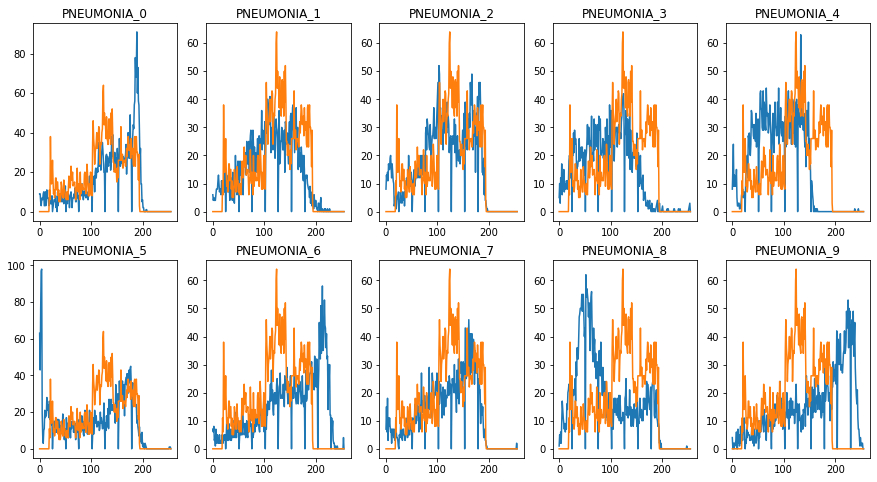

In [30]:
fig = plt.figure(figsize = (15,8))
for i in range(10):
    pneu_img = pneumonia_images_matrix_10[i]
    hist_p = cv2.calcHist([pneu_img], [0], None, [256], [10, 256]) # adjust the range to avoid a spike at 0
    label = f'PNEUMONIA_{i}'
    ax = fig.add_subplot(2, 5, i+1)
    plt.plot(hist_p, label='Pneumonia' )
    plt.plot(hist_pneum, label='Mean')
    plt.title(label)
plt.show()

### Analysis of the Pneumonia pixel intensity plots

From the above plots, it seems that the pixel intensities for the pneumonia images are much more varied than would be expected compared to the mean. This may mean that while the mean pneumonia x-ray profile shows that a difference exists between normal and pneumonia, there is enough variability that simply using the pixel intensity profile would not be a good enough indicator for predicting pneumonia from x-ray images. This is somewhat expected since the standard deviation x-ray image showed much variability in images.